In [100]:
from model import KMeans
from utils import get_image, show_image, save_image, error

In [101]:
def main():
    # get image
    image = get_image('my_image.png')
    img_shape = image.shape

    # reshape image
    image_flat = image.reshape(-1, image.shape[-1])
    k_values=[1,2,3,5,7,10,20,50]
    mse_values=[]

    # create model
    num_clusters = 5 
    # CHANGE THIS
    for num_clusters in k_values:
        kmeans = KMeans(num_clusters)

        # fit model
        kmeans.fit(image_flat)

        # replace each pixel with its closest cluster center
        image_flat_clustered = kmeans.replace_with_cluster_centers(image)

        # reshape image
        image_flat_clustered = image_flat_clustered.reshape(img_shape)

        # Print the error
        mse=error(image.reshape(-1,3),image_flat_clustered)
        mse_values.append(mse)
        print('MSE:',mse)

        # show/save image
        # show_image(image)
        save_image(image_flat_clustered, f'image_clustered_{num_clusters}.png')
    plt.plot(k_values, mse_values)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('MSE')
    plt.show()
    





In [102]:
from matplotlib import pyplot as plt
import numpy as np

def get_image(image_path):
    image = plt.imread(image_path)
    return image.reshape(-1,3)/255.0


def show_image(image):
    plt.imshow(image)
    plt.show()

def save_image(image, image_path,format='png'):
    plt.imsave(image_path, image,format=format)


def error(original_image: np.ndarray, clustered_image: np.ndarray) -> float:
    # Returns the Mean Squared Error between the original image and the clustered image
    return ((original_image-clustered_image)**2).mean()

In [103]:
import numpy as np

class KMeans:
    def __init__(self, k: int, epsilon: float = 1e-6) -> None:
        self.num_clusters = k
        self.cluster_centers = None
        self.epsilon = epsilon
    
    def fit(self, X: np.ndarray, max_iter: int = 100) -> None:
        # Initialize cluster centers (need to be careful with the initialization,
        # otherwise you might see that none of the pixels are assigned to some
        # of the clusters, which will result in a division by zero error)
        self.cluster_centers=np.array(X[np.random.choice(X.shape[0],self.num_clusters,replace=False),:])
        

        for _ in range(max_iter):
            # Assign each sample to the closest prototype
            distances=np.sqrt(((X[:,np.newaxis,:]-self.cluster_centers)**2).sum(axis=2))
            closest_cluster=np.argmin(distances,axis=1)
            
            
            # Update prototypes
            new_centers=np.array([np.nanmean(X[closest_cluster==j],axis=0) if np.any(closest_cluster == j) else self.cluster_centers[j] for j in range(self.num_clusters)])
            
            if np.allclose(new_centers,self.cluster_centers,rtol=0,atol=self.epsilon):
                break
            self.cluster_centers=new_centers
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        distances = np.sqrt(((X[:, np.newaxis, :] - self.cluster_centers) ** 2).sum(axis=2))
        return np.argmin(distances,axis=1)
    
    def fit_predict(self, X: np.ndarray, max_iter: int = 100) -> np.ndarray:
        self.fit(X, max_iter)
        return self.predict(X)
    
    def replace_with_cluster_centers(self, X: np.ndarray) -> np.ndarray:
        distances = np.sqrt(((X[:, np.newaxis, :] - self.cluster_centers) ** 2).sum(axis=2))
        closest_cluster=np.argmin(distances,axis=1)
        return self.cluster_centers[closest_cluster]

In [104]:
Image=get_image('image.jpg')

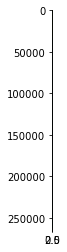

In [105]:
show_image(Image)

In [106]:
save_image(Image,'my_image.png')

MSE: 1.726919e-06
MSE: 1.1468138e-06
MSE: 6.084745e-07
MSE: 3.9481492e-07
MSE: 2.1887844e-07
MSE: 1.9947619e-07
MSE: 3.23481e-08
MSE: 8.867873e-09


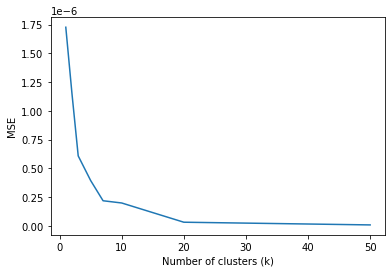

In [107]:
main()